In [26]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Connect to my database

conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [29]:
import pandas as pd

# Query to get the data
query = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Washington_Kicking_Stats;
"""

uw_kicking = pd.read_sql(query, conn)

# FG data provided as a list of strings
fg_data = [
    "0-0", "0-1", "2-2", "1-1", "1-1", "0-0", "3-3", "0-0", "1-1", "2-3", 
    "0-1", "1-2", "2-2", "3-3", "2-2", "1-1", "1-1", "1-1", "4-4", "1-1", 
    "1-1", "0-1", "2-3", "1-1", "3-3", "1-2", "1-1", "2-2", "0-1", "1-1", 
    "1-1", "1-2", "1-1", "1-1", "0-0", "4-4", "0-0", "1-1", "1-2", "0-0", 
    "2-3", "1-2", "1-2", "2-2", "1-1", "4-4", "1-1", "1-1", "2-2", "2-2", 
    "3-3", "1-1", "0-0", "2-4", "0-0", "1-1", "1-1", "3-4", "1-1", "0-0", 
    "2-2", "0-2", "1-1", "2-3", "2-2", "1-1", "2-2", "0-1", "0-0", "1-2", 
    "1-1", "3-3", "0-1", "0-0", "1-3", "0-1", "0-1", "0-2", "3-3", "1-2", 
    "0-0", "2-3", "2-2", "0-0", "2-3", "1-1", "0-0", "0-2", "1-1", "0-0", 
    "2-2", "1-1", "1-1", "2-3", "3-3", "1-1", "2-2", "0-0", "2-3", "0-0", 
    "1-1", "1-1", "1-2", "2-2", "0-0", "0-0", "3-3", "1-2", "1-1", "1-2", 
    "3-3", "1-1", "1-1", "3-3", "1-1", "0-0", "1-2", "2-2", "1-2", "1-1", 
    "3-3", "2-2", "3-3", "1-1", "0-1", "1-1", "2-2", "0-0", "1-1", "0-0", 
    "1-1", "1-1", "2-2", "1-1", "1-2", "2-2", "2-2", "1-1"
]

# Ensure the length of fg_data matches the length of ucla_kicking DataFrame
if len(fg_data) == len(uw_kicking):
    # Add the FG data to the DataFrame
    uw_kicking['FG'] = fg_data

    # Split FG column into separate columns for makes and attempts
    uw_kicking[['fg_makes', 'fg_attempts']] = uw_kicking['FG'].str.split('-', expand=True)

    # Convert the makes and attempts columns to numeric, handling non-numeric cases
    uw_kicking['fg_makes'] = pd.to_numeric(uw_kicking['fg_makes'], errors='coerce')
    uw_kicking['fg_attempts'] = pd.to_numeric(uw_kicking['fg_attempts'], errors='coerce')

    # Calculate FG percentage
    uw_kicking['fg_percentage'] = (uw_kicking['fg_makes'] / uw_kicking['fg_attempts']) * 100

    # Handle any potential divisions by zero (e.g., if attempts are 0)
    uw_kicking['fg_percentage'] = uw_kicking['fg_percentage'].fillna(0)

    # Display the first few rows of the data
    print(uw_kicking.head())
else:
    print(f"Length of fg_data ({len(fg_data)}) does not match length of DataFrame ({len(uw_kicking)}).")
    


         date location        opponent  fg_1_19  fg_20_29  fg_30_39  fg_40_49  \
0  2014-11-15        @         Arizona        0         0         2         0   
1  2023-09-02        H     Boise State        0         0         0         0   
2  2023-09-09        H           Tulsa        0         0         0         0   
3  2023-09-16        @  Michigan State        0         2         0         0   
4  2023-09-23        H      California        0         0         0         1   

   fg_50_plus  longest_fg  fg_percentage  ...  xp_made  points_scored  temp_f  \
0           0          39            0.0  ...        2              8    62.3   
1           0           0            0.0  ...        8              8    65.7   
2           0           0          100.0  ...        5              5    67.7   
3           0          29          100.0  ...        5             11    61.4   
4           0          41          100.0  ...        7             10    56.3   

   precipitation_in  winds

/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_61935/3717723917.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  uw_kicking = pd.read_sql(query, conn)


In [22]:
# Check the number of rows in the ucla_kicking DataFrame
num_rows = len(uw_kicking)
print(f"Number of rows in ucla_kicking: {num_rows}")

# Check the length of the fg_data list
num_fg_data = len(fg_data)
print(f"Number of entries in fg_data: {num_fg_data}")

# Check if there is a discrepancy
if num_rows != num_fg_data:
    print("Discrepancy found between the number of rows in ucla_kicking and the length of fg_data.")
else:
    print("The number of rows matches the length of fg_data.")


Number of rows in ucla_kicking: 137
Number of entries in fg_data: 138
Discrepancy found between the number of rows in ucla_kicking and the length of fg_data.


In [30]:
# Lets see how many instances of each wind speed fall under arbitrary ranges


# Define the wind speed ranges
wind_speed_bins = [0, 5, 10, 15, 20, float('inf')]
wind_speed_labels = ['0-5 mph', '5-10 mph', '10-15 mph', '15-20 mph', '20+ mph']

# Create a new column in the dataframe for wind speed ranges
uw_kicking['Wind_Speed_Range'] = pd.cut(uw_kicking['windspeed_mph'], bins=wind_speed_bins, labels=wind_speed_labels, right=False)

# Count the number of observations in each wind speed range
wind_speed_distribution = uw_kicking['Wind_Speed_Range'].value_counts().sort_index()

# Display the distribution
print(wind_speed_distribution)



Wind_Speed_Range
0-5 mph       2
5-10 mph     27
10-15 mph    60
15-20 mph    30
20+ mph      19
Name: count, dtype: int64


In [31]:
uw_kicking['Wind_Range'] = pd.cut(
    uw_kicking['windspeed_mph'], 
    bins=[-np.inf, 5, 10, 15, 20, 100], 
    labels=['<5', '5-10', '10-15', '15-20', '20+']
)

In [33]:
# check the number of rows in dataframe to make sure missing entry was added successfully
num_rows_dataframe = len(uw_kicking)

num_entries_fg_data = len(fg_data)

if num_rows_dataframe == num_entries_fg_data:
    print("The number of FG data entries matches the number of rows in the DataFrame.")
else:
    print(f"Mismatch detected: DataFrame has {num_rows_dataframe} rows, but there are {num_entries_fg_data} FG data entries.")


The number of FG data entries matches the number of rows in the DataFrame.


/var/folders/d0/gj8tfnxn3jd2gjx88tk4mp180000gn/T/ipykernel_61935/1108225290.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_speed_fg_totals = uw_kicking.groupby('Wind_Speed_Range').agg({'fg_makes': 'sum', 'fg_attempts': 'sum'})


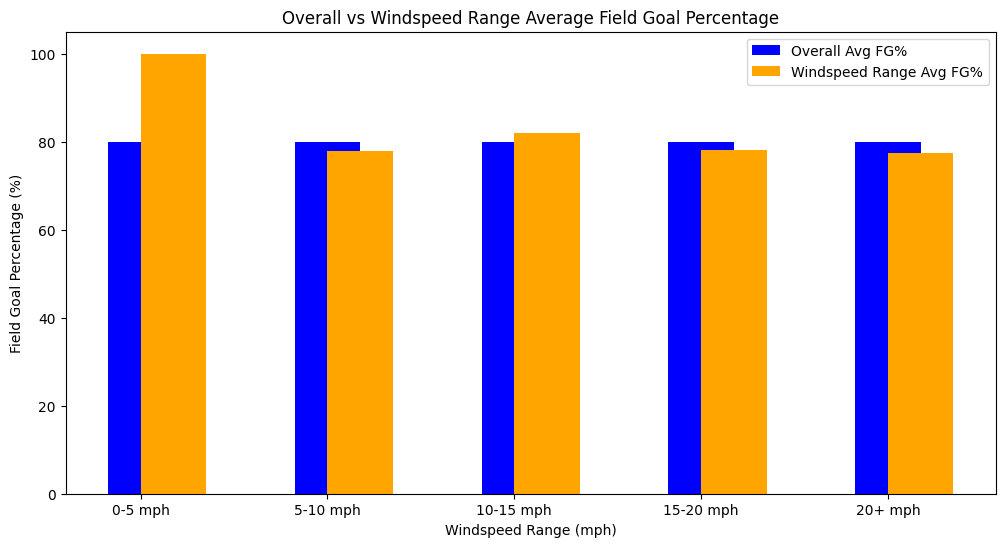

In [34]:
# Define the wind speed ranges
wind_speed_bins = [0, 5, 10, 15, 20, float('inf')]
wind_speed_labels = ['0-5 mph', '5-10 mph', '10-15 mph', '15-20 mph', '20+ mph']

# Create a new column in the dataframe for wind speed ranges
uw_kicking['Wind_Speed_Range'] = pd.cut(uw_kicking['windspeed_mph'], bins=wind_speed_bins, labels=wind_speed_labels, right=False)

# Calculate total FG makes and attempts for each wind speed range
wind_speed_fg_totals = uw_kicking.groupby('Wind_Speed_Range').agg({'fg_makes': 'sum', 'fg_attempts': 'sum'})

# Calculate FG percentage for each wind speed range
wind_speed_fg_totals['Wind_Range_Avg_FG%'] = (wind_speed_fg_totals['fg_makes'] / wind_speed_fg_totals['fg_attempts']) * 100

# Calculate the overall FG percentage across all wind speed ranges
overall_fg_makes = uw_kicking['fg_makes'].sum()
overall_fg_attempts = uw_kicking['fg_attempts'].sum()
overall_avg_fg = (overall_fg_makes / overall_fg_attempts) * 100

# Prep data for plotting
avg_data = pd.DataFrame({
    'Wind_Range': wind_speed_fg_totals.index,
    'Overall_Avg_FG%': [overall_avg_fg] * len(wind_speed_fg_totals),
    'Wind_Range_Avg_FG%': wind_speed_fg_totals['Wind_Range_Avg_FG%'].values
})


# graph
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(avg_data['Wind_Range'], avg_data['Overall_Avg_FG%'], width=bar_width, label='Overall Avg FG%', color='blue', align='center')
plt.bar(avg_data['Wind_Range'], avg_data['Wind_Range_Avg_FG%'], width=bar_width, label='Windspeed Range Avg FG%', color='orange', align='edge')

plt.xlabel('Windspeed Range (mph)')
plt.ylabel('Field Goal Percentage (%)')
plt.title('Overall vs Windspeed Range Average Field Goal Percentage')
plt.legend()

plt.show()
